In [1]:
import math
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn                  


# Оценка целевой аудитории для кредитной кампании банка

## Данные

### Общая информация

Данные представляют собой сведения о клиентах банка, которые взяли кредит в ходе последней кампании (таких около 9%). Теперь руководство банка хочет выявить целевую аудиторию для новой кампании. 

Файл содержит информацию о возрасте, доходе, месте проживания, образовании, доходах и расходах 5000 клиентов банка.

In [2]:
raw_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
raw_data.shape

(5000, 14)

In [4]:
raw_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Признаки

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Всего данные содержат 14 признаков

* ID: уникальный ID клиента
* Age: возраст клиента
* Experience: количество лет рабочего стажа
* Income: годовой доход (в тысячах \$)
* ZIP Code: ZIP код
* Family: размер семьи
* CCAvg: среднемесячные траты по кредитной карте (в тысячах \$)
* Education: уровень образования: 1 - бакалавриат (Undergrad); 2 - магистратура (Graduate); 3 - Advanced/Professional
* Mortgage: величина ипотеки (в тысячах \$)
* Personal Loan: принял ли клиент персональное предложение о кредите (1 - да / 0 - нет)
* Securities Account: есть ли у клиента счет в ценных бумагах в банке (1 - да / 0 - нет)
* CD Account: есть ли у клиента депозитный сертификат в банке (1 - да / 0 - нет)
* Online: пользуется ли клиент услугами интернет-банкинга (1 - да / 0 - нет)
* CreditCard: пользуется ли клиент кредитной картой, выпущенной каким-либо другим банком (1 - да / 0 - нет)

Целевой признак для предсказания - Personal Loan

### Пропущенные значения

In [6]:
raw_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Пропущенные значения отсутвуют

### Основные статистики

In [7]:
raw_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Вызывает подозрение отрицательное число лет рабочего опыта

## Первичная обработка данных

In [8]:
data = raw_data.copy()

Удаляем столбец ID, т.к. он не содержит полезной информации

In [9]:
data.drop(['ID'],axis=1,inplace=True)

Уберем пробелы в именах признаков

In [10]:
data.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":"CDAccount"},inplace=True)

In [11]:
data.sample(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
135,58,33,45,93010,4,2.1,1,0,0,0,0,1,1
2938,33,9,61,93943,3,2.6,2,0,0,0,0,1,0
2122,55,29,64,93437,3,0.8,1,119,0,0,0,0,1
4236,37,12,128,91342,2,3.9,1,0,0,0,0,1,1
4769,26,2,20,95064,4,1.0,1,116,0,0,0,0,0
4023,51,25,175,90089,3,0.7,1,312,1,0,0,0,0
3341,35,9,33,91125,2,0.3,1,0,0,1,0,1,0
848,57,32,19,94720,4,0.9,2,0,0,0,0,1,0
4787,48,22,42,95054,3,0.6,2,121,0,0,0,1,0
3703,67,41,78,94301,4,2.4,3,0,0,1,0,0,0


Посмотрим на отрицательные значения признака Experience, всего есть 52 таких строки

In [12]:
len(data[data.Experience < 0])

52

In [13]:
data[data.Experience < 0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [14]:
data[data.Experience < 0].describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.0,52.000000,52.000000
mean,24.519231,-1.442308,69.942308,93240.961538,2.865385,2.129423,2.076923,43.596154,0.0,0.115385,0.0,0.576923,0.288462
std,1.475159,0.639039,37.955295,1611.654806,0.970725,1.750562,0.836570,90.027068,0.0,0.322603,0.0,0.498867,0.457467
min,23.000000,-3.000000,12.000000,90065.000000,1.000000,0.200000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,24.000000,-2.000000,40.750000,92167.750000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,24.000000,-1.000000,65.500000,93060.000000,3.000000,1.800000,2.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
75%,25.000000,-1.000000,86.750000,94720.000000,4.000000,2.325000,3.000000,0.000000,0.0,0.000000,0.0,1.000000,1.000000
max,29.000000,-1.000000,150.000000,95842.000000,4.000000,7.200000,3.000000,314.000000,0.0,1.000000,0.0,1.000000,1.000000


Это молодые люди в основном 23-25 лет, однако имеющие годовой доход, в основном, неплохой и в массе активно пользующиеся кредитной картой. Предположим, что отрицательное число лет опыта было введено по ошибке и заменим их абсолютными значениями.

In [15]:
data.loc[data.Experience < 0, 'Experience'] = np.abs(data.Experience)

In [16]:
len(data[data.Experience < 0])

0

### Обработка ZIP кодов

Почтовый код может быть преобразован в регион с использованием библиотеки `uszipcode`:

`pip install uszipcode`

С помощью библиотеки можно получить следующую важную информацию из почтового кода:
* город
* штат
* количество населения
* плотность населения
* медианный доход домохозяйств
* медианная стоимость жилья
* количество жилья / кол-во занятого жилья

Эти данные можно использовать в качестве признаков для дальнейшего анализа

In [17]:
from uszipcode import SearchEngine
engine = SearchEngine()

C:\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [18]:
data['ZIPCode'].head()

0    91107
1    90089
2    94720
3    94112
4    91330
Name: ZIPCode, dtype: int64

In [19]:
data['ZIPInfo'] = data.apply(lambda row: engine.by_zipcode(int(row['ZIPCode'])), axis=1)

In [20]:
data['Population'] = data.apply(lambda row: row['ZIPInfo'].population if row['ZIPInfo'] is not None else None, axis=1);
data['PopulationDensity'] = data.apply(lambda row: row['ZIPInfo'].population_density if row['ZIPInfo'] is not None else None, axis=1);
data['HousingUnits'] = data.apply(lambda row: row['ZIPInfo'].housing_units if row['ZIPInfo'] is not None else None, axis=1);
data['OccupiedHousingUnits'] = data.apply(lambda row: row['ZIPInfo'].occupied_housing_units if row['ZIPInfo'] is not None else None, axis=1);
data['MedianHomeValue'] = data.apply(lambda row: row['ZIPInfo'].median_home_value if row['ZIPInfo'] is not None else None, axis=1);
data['MedianHouseholdIncome'] = data.apply(lambda row: row['ZIPInfo'].median_household_income if row['ZIPInfo'] is not None else None, axis=1);

In [21]:
data.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,ZIPInfo,Population,PopulationDensity,HousingUnits,OccupiedHousingUnits,MedianHomeValue,MedianHouseholdIncome
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,"SimpleZipcode(zipcode='91107', zipcode_type='S...",32940.0,4008.0,13763.0,13028.0,633100.0,80936.0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,"SimpleZipcode(zipcode='90089', zipcode_type='U...",NaN,NaN,NaN,NaN,NaN,NaN
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,"SimpleZipcode(zipcode='94720', zipcode_type='U...",NaN,NaN,NaN,NaN,NaN,NaN
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,"SimpleZipcode(zipcode='94112', zipcode_type='S...",79407.0,23606.0,23081.0,21975.0,602400.0,71625.0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,"SimpleZipcode(zipcode='91330', zipcode_type='U...",NaN,NaN,NaN,NaN,NaN,NaN
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,"SimpleZipcode(zipcode='92121', zipcode_type='S...",4179.0,341.0,1752.0,1677.0,569000.0,104063.0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,"SimpleZipcode(zipcode='91711', zipcode_type='S...",35705.0,2379.0,12431.0,11868.0,530400.0,88240.0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,"SimpleZipcode(zipcode='93943', zipcode_type='S...",NaN,NaN,NaN,NaN,NaN,NaN
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,"SimpleZipcode(zipcode='90089', zipcode_type='U...",NaN,NaN,NaN,NaN,NaN,NaN
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,"SimpleZipcode(zipcode='93023', zipcode_type='S...",20589.0,76.0,9096.0,8280.0,514900.0,62133.0


К сожалению, довольно существенная часть данных отсутствует в библиотеке

In [22]:
data['PopulationDensity'].isnull().sum()

1015

In [23]:
data[data['PopulationDensity'].isnull()]['ZIPCode'].unique()

array([90089, 94720, 91330, 93943, 93106, 90095, 94035, 91380, 92093,
       93407, 95617, 92717, 94143, 92096, 92182, 90840, 92834, 91125,
       93524, 92521, 93118, 92697, 92152, 95929, 93437, 92038, 92192,
        9307, 94309, 90073, 94998, 90509, 92068, 92634, 92177, 90009,
       93014, 91614, 94234, 94701, 91129, 90071, 96651, 91109, 93009,
       93107, 92709, 91116, 90747, 95812, 95192, 94126, 91365, 95741,
       90086, 95211, 92350, 92735, 94604, 90639, 94302, 92161, 94575,
       93403, 93302, 95518, 95193], dtype=int64)

При наличии времени, можно было бы восполнить пропущенные данные, используя открытую информацию с сайта http://www.usa.com/, но учитывая, что работа носит учебный характер, заменим отсутствующие значения модой.

In [24]:
feat = ['Population', 'PopulationDensity', 'HousingUnits', 'OccupiedHousingUnits', 'MedianHomeValue', 'MedianHouseholdIncome'];
data[feat].median(axis = 0)

Population                34204.0
PopulationDensity          3730.0
HousingUnits              14021.0
OccupiedHousingUnits      13028.0
MedianHomeValue          569000.0
MedianHouseholdIncome     75599.0
dtype: float64

In [25]:
data[feat] = data[feat].fillna(data[feat].median(axis = 0), axis = 0)

In [26]:
data.isna().sum() 

Age                       0
Experience                0
Income                    0
ZIPCode                   0
Family                    0
CCAvg                     0
Education                 0
Mortgage                  0
PersonalLoan              0
SecuritiesAccount         0
CDAccount                 0
Online                    0
CreditCard                0
ZIPInfo                  33
Population                0
PopulationDensity         0
HousingUnits              0
OccupiedHousingUnits      0
MedianHomeValue           0
MedianHouseholdIncome     0
dtype: int64

Введем дополнительный признак `HouseUsedCoef`, представляющий собой отношение числа незанятых домов к занятым. 

In [27]:
data['HouseUsedCoef'] = data.apply(lambda row: row['OccupiedHousingUnits'] / row['HousingUnits'], axis=1);

Удалим временные столбцы

In [28]:
data.drop(['ZIPInfo'], axis = 1, inplace = True);
data.drop(['HousingUnits'], axis = 1, inplace = True);
data.drop(['OccupiedHousingUnits'], axis = 1, inplace = True);
data.drop(['ZIPCode'], axis = 1, inplace = True);

Т.о. получили дополнительные признаки:
* `Population` - кол-во населения
* `PopulationDensity` - плотность населения
* `HouseUsedCoef` - отношение числа незанятых домов к занятым (может служить косвенным показателем развития района)
* `MedianHomeValue` - медианная стоимость жилья
* `MedianHouseholdIncome` - медианный доход домохозяйств

### Анализ признаков, визуализация распределения, удаление выбросов

Проанализируем распределение числовых признаков (такими можно считать Age, Experience, Income, Family, CCAvg, Mortgage, остальные признаки будем считать категориальными), при необходимости - удалим выбросы

In [29]:
numerical = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Population', 'PopulationDensity', 'HouseUsedCoef', 'MedianHomeValue', 'MedianHouseholdIncome'];

In [30]:
def plot_distribs():
    fig, axes = plt.subplots(len(numerical), 2, figsize = (20,35));
    fig.suptitle('Distribution charts for {}'.format(numerical));
    
    for i, a in enumerate(numerical):
        sns.boxplot(data[a], ax = axes[i][0], orient="h");
        axes[i][0].set(xlabel = 'Boxplot of {}'.format(a));
        pp = sns.histplot(data[a], ax = axes[i][1], kde=True, bins = 10, color = "mediumslateblue");
        axes[i][1].set(xlabel = 'Distribution of {}'.format(a));

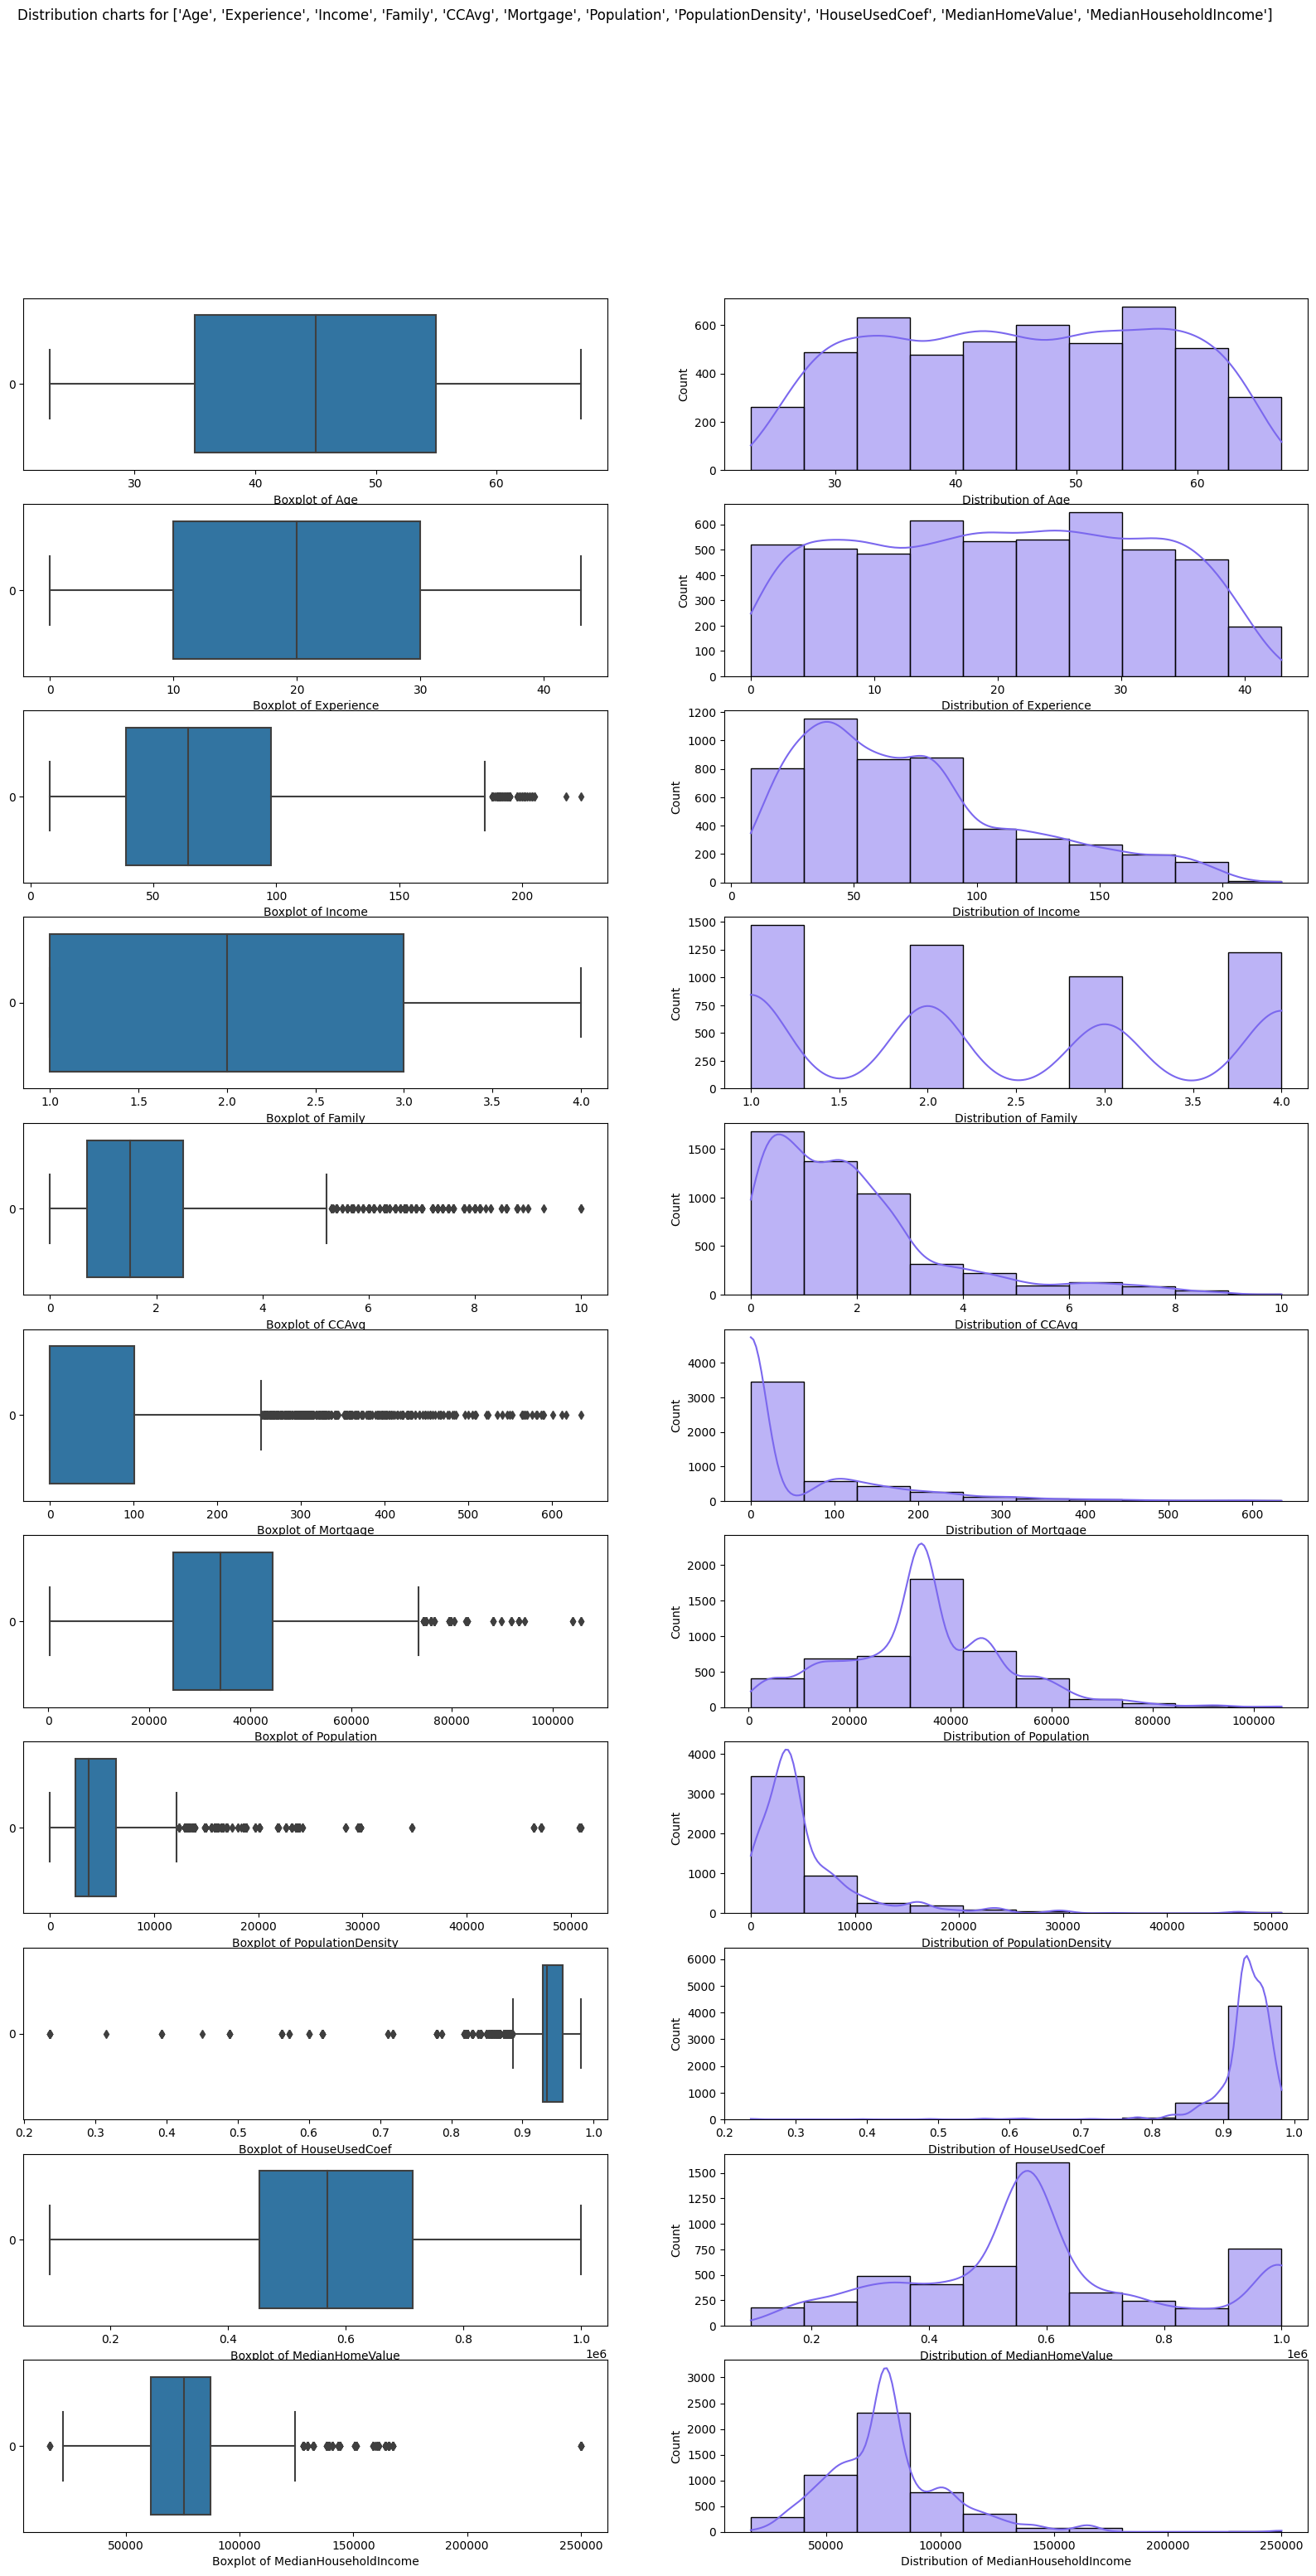

In [31]:
plot_distribs();

Будем считать выбросами данные, превышающие 0.995 квантили в признаках Income, CCAvg, Mortgage, MedianHouseholdIncome

In [32]:
rows_to_drop = data[
    (data['Income'] > data['Income'].quantile(0.995)) | 
    (data['CCAvg']  > data['CCAvg' ].quantile(0.995)) |
    (data['Mortgage']  > data['Mortgage' ].quantile(0.995)) |
    (data['MedianHouseholdIncome']  > data['MedianHouseholdIncome' ].quantile(0.995))
].index
data = data.drop(rows_to_drop)
data.shape

(4915, 17)

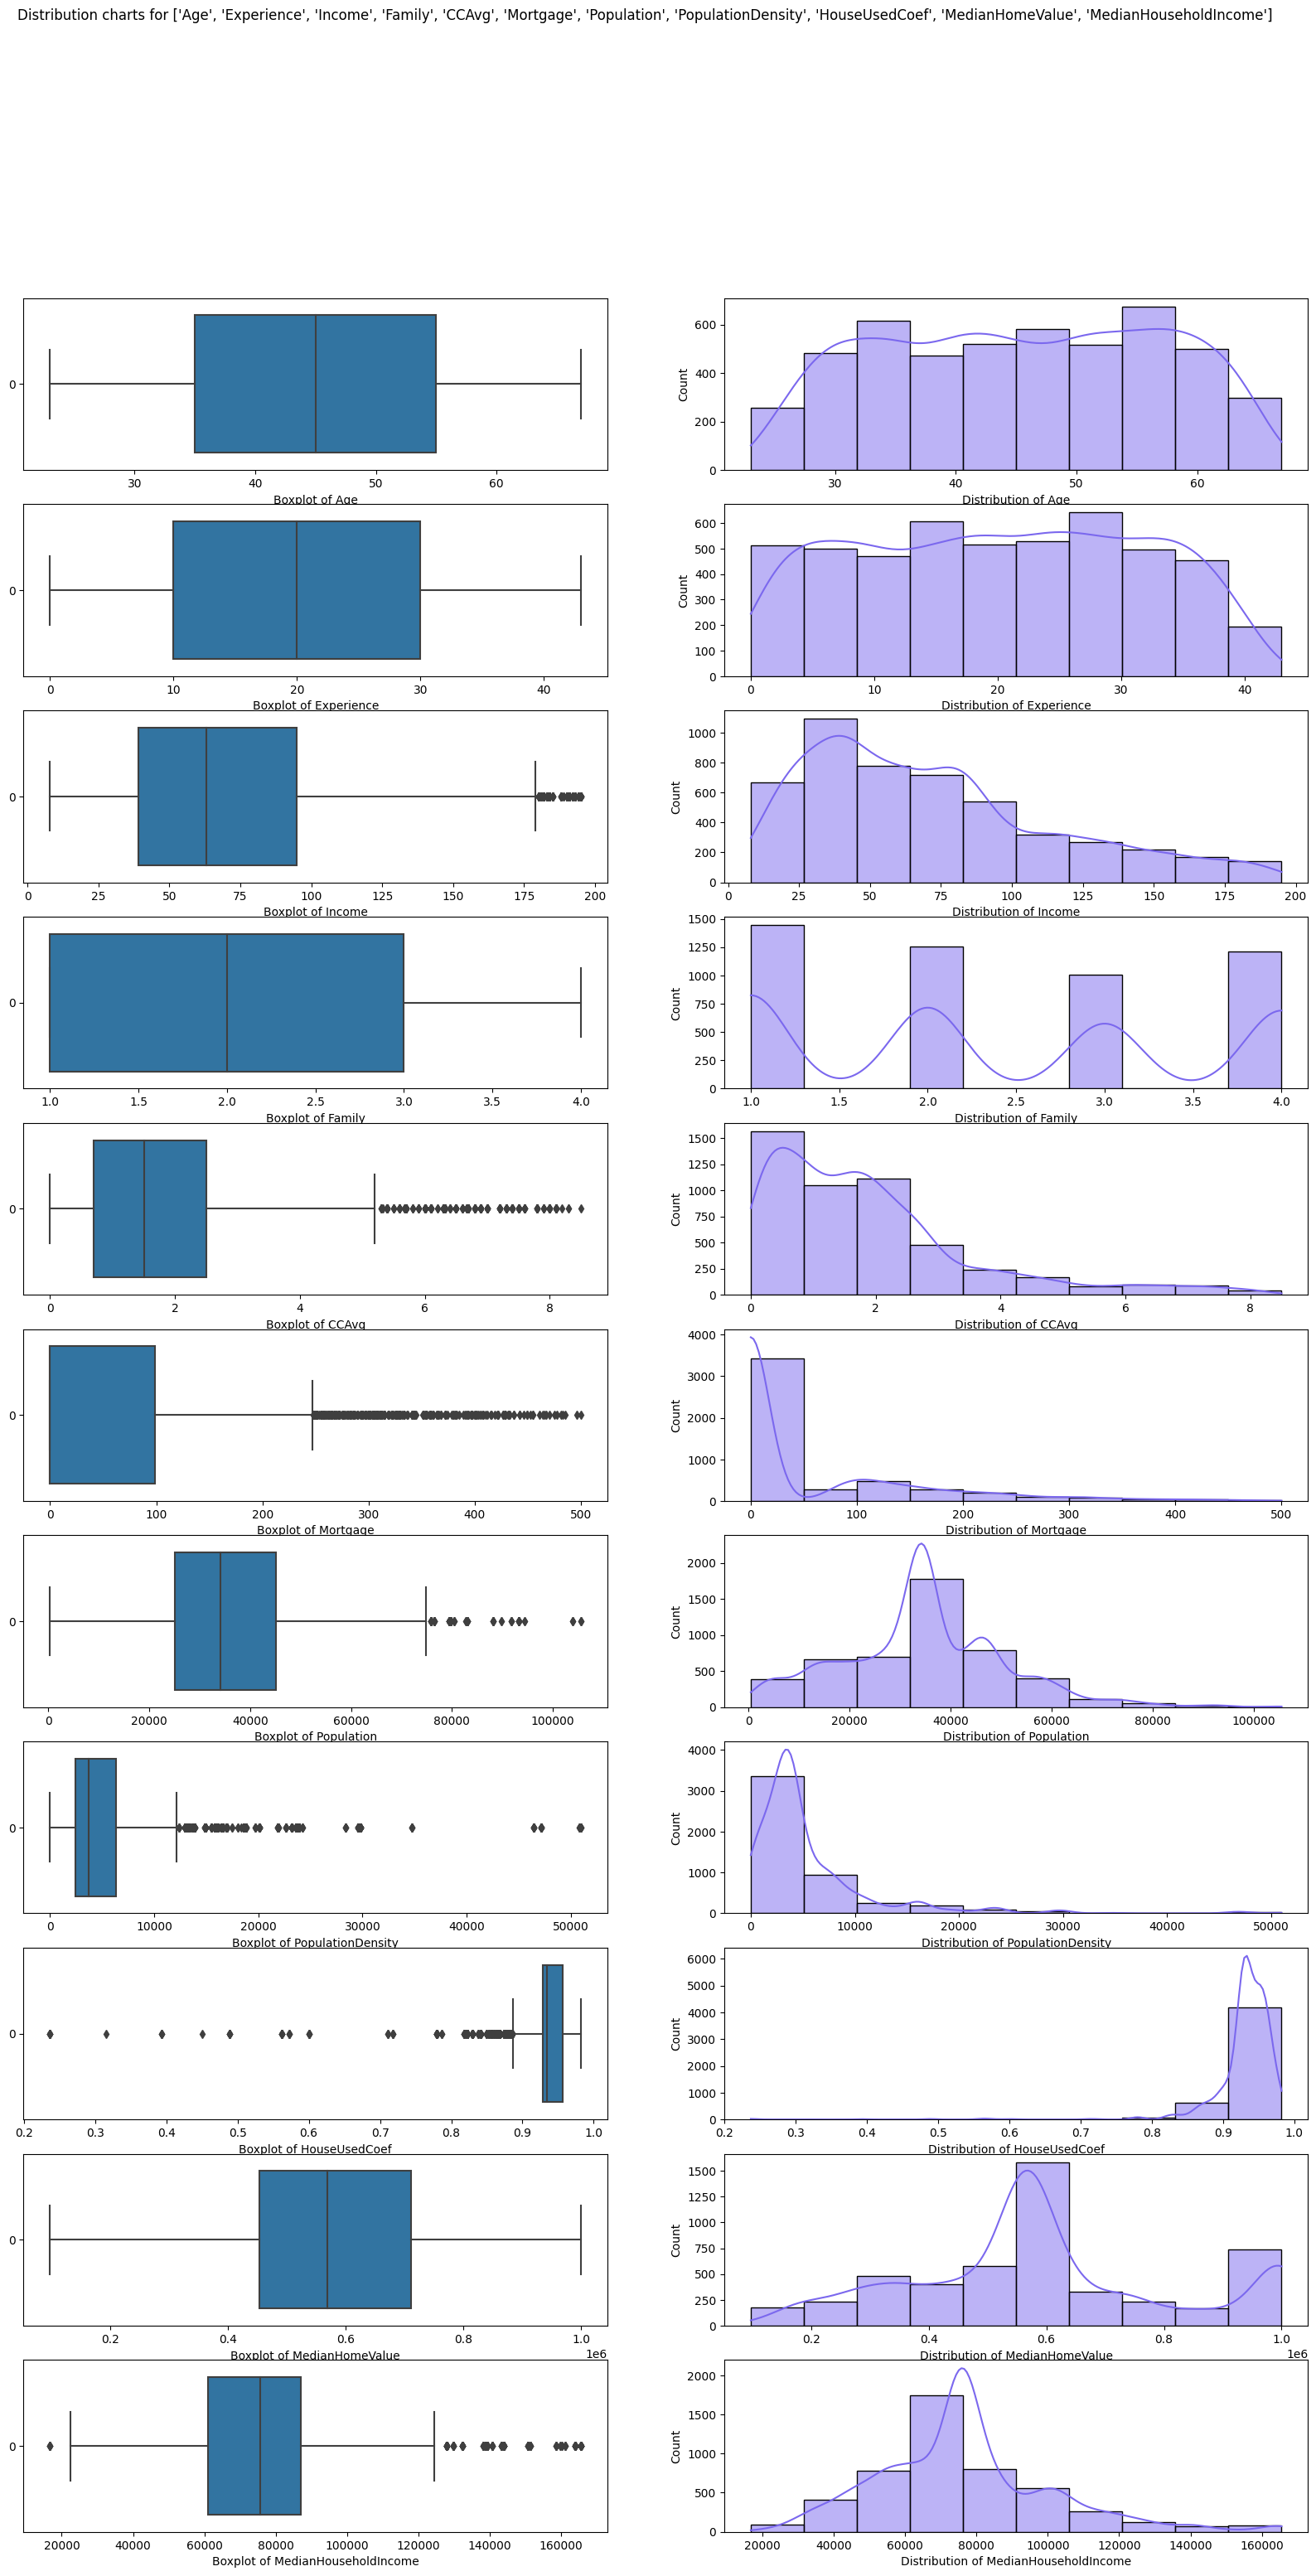

In [33]:
plot_distribs();

Остальные признаки преобразуем к категориальным

In [34]:
category = ['Education','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']
data[category] = data[category].astype('category')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    4915 non-null   int64   
 1   Experience             4915 non-null   int64   
 2   Income                 4915 non-null   int64   
 3   Family                 4915 non-null   int64   
 4   CCAvg                  4915 non-null   float64 
 5   Education              4915 non-null   category
 6   Mortgage               4915 non-null   int64   
 7   PersonalLoan           4915 non-null   category
 8   SecuritiesAccount      4915 non-null   category
 9   CDAccount              4915 non-null   category
 10  Online                 4915 non-null   category
 11  CreditCard             4915 non-null   category
 12  Population             4915 non-null   float64 
 13  PopulationDensity      4915 non-null   float64 
 14  MedianHomeValue        4915 non-null   f

### Корреляция признаков

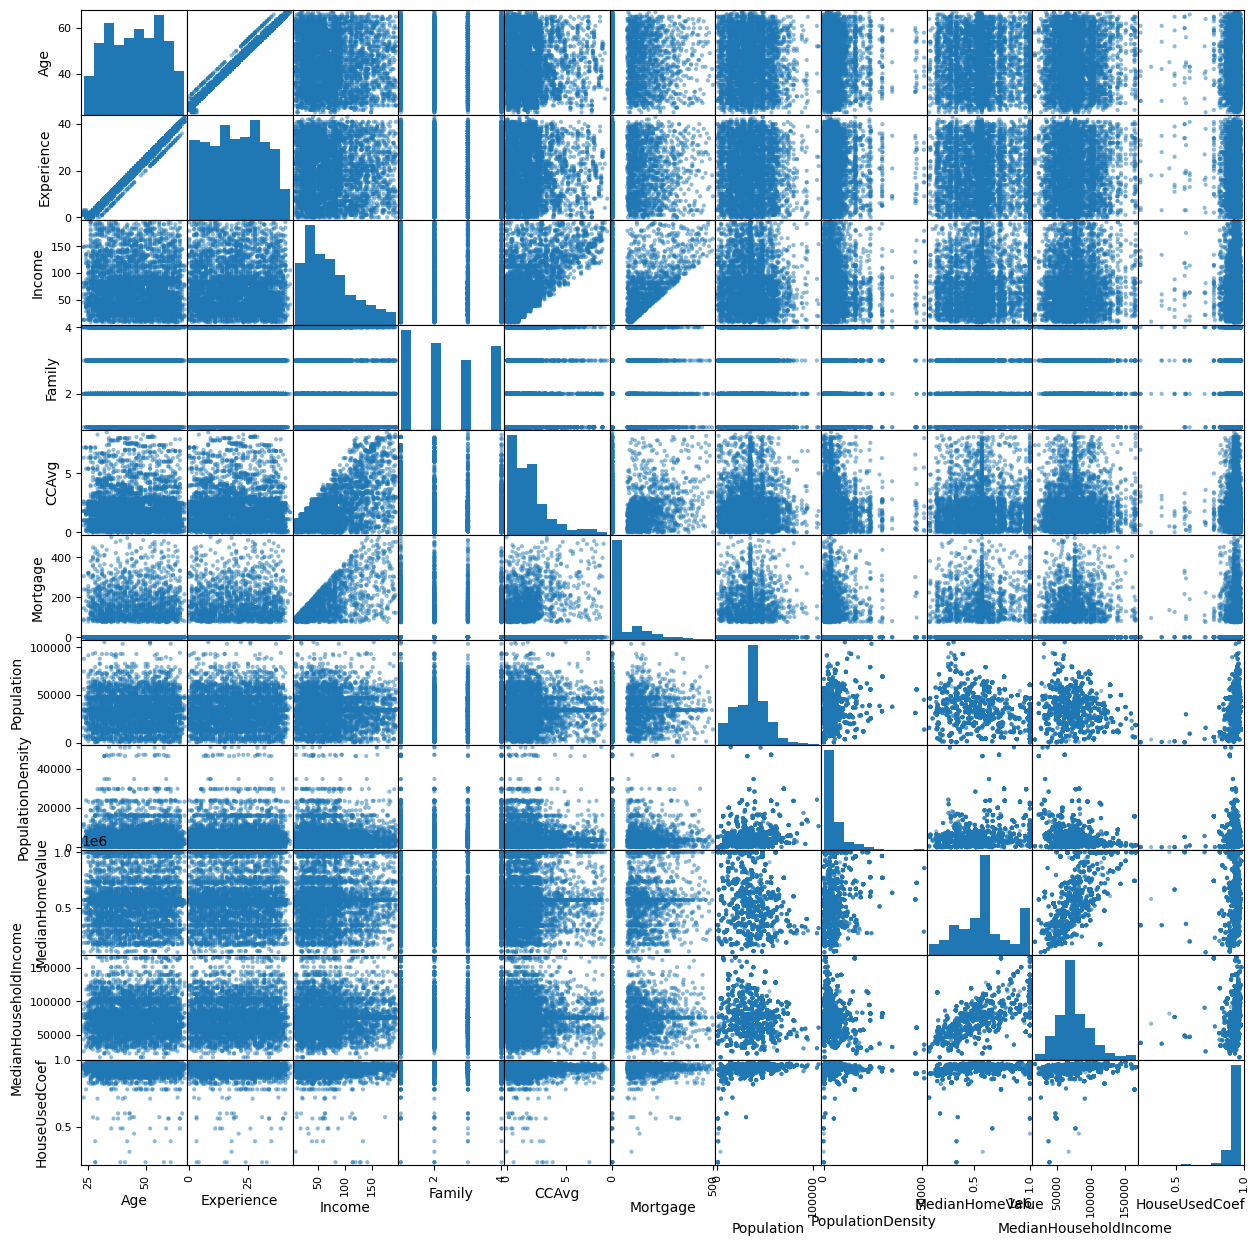

In [36]:
pd.plotting.scatter_matrix(data, figsize = (15, 15))
pass

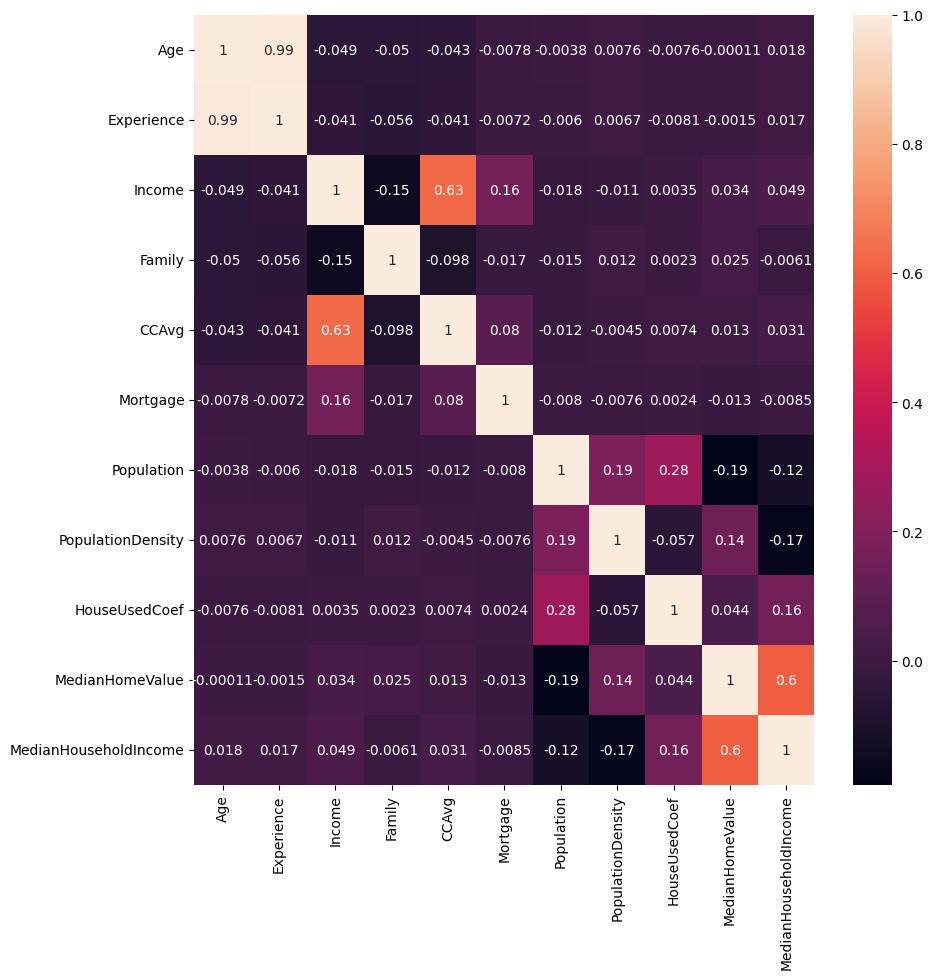

In [37]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(data[numerical].corr(), annot=True)
pass

Коэффициент корреляции между возрастом и опытом работы порядка 1, поэтому один из этих признаков можно удалить

In [38]:
data.drop(['Experience'], axis=1, inplace=True)

Также есть очевидная корреляция между уровнем дохода и тратами по кредитной карте в месяц, однако между доходом и величиной ипотеки корреляция отсутствует

### Категориальные признаки

Рассмотрим сколько раз категориальные признаки принимают то или иное значение

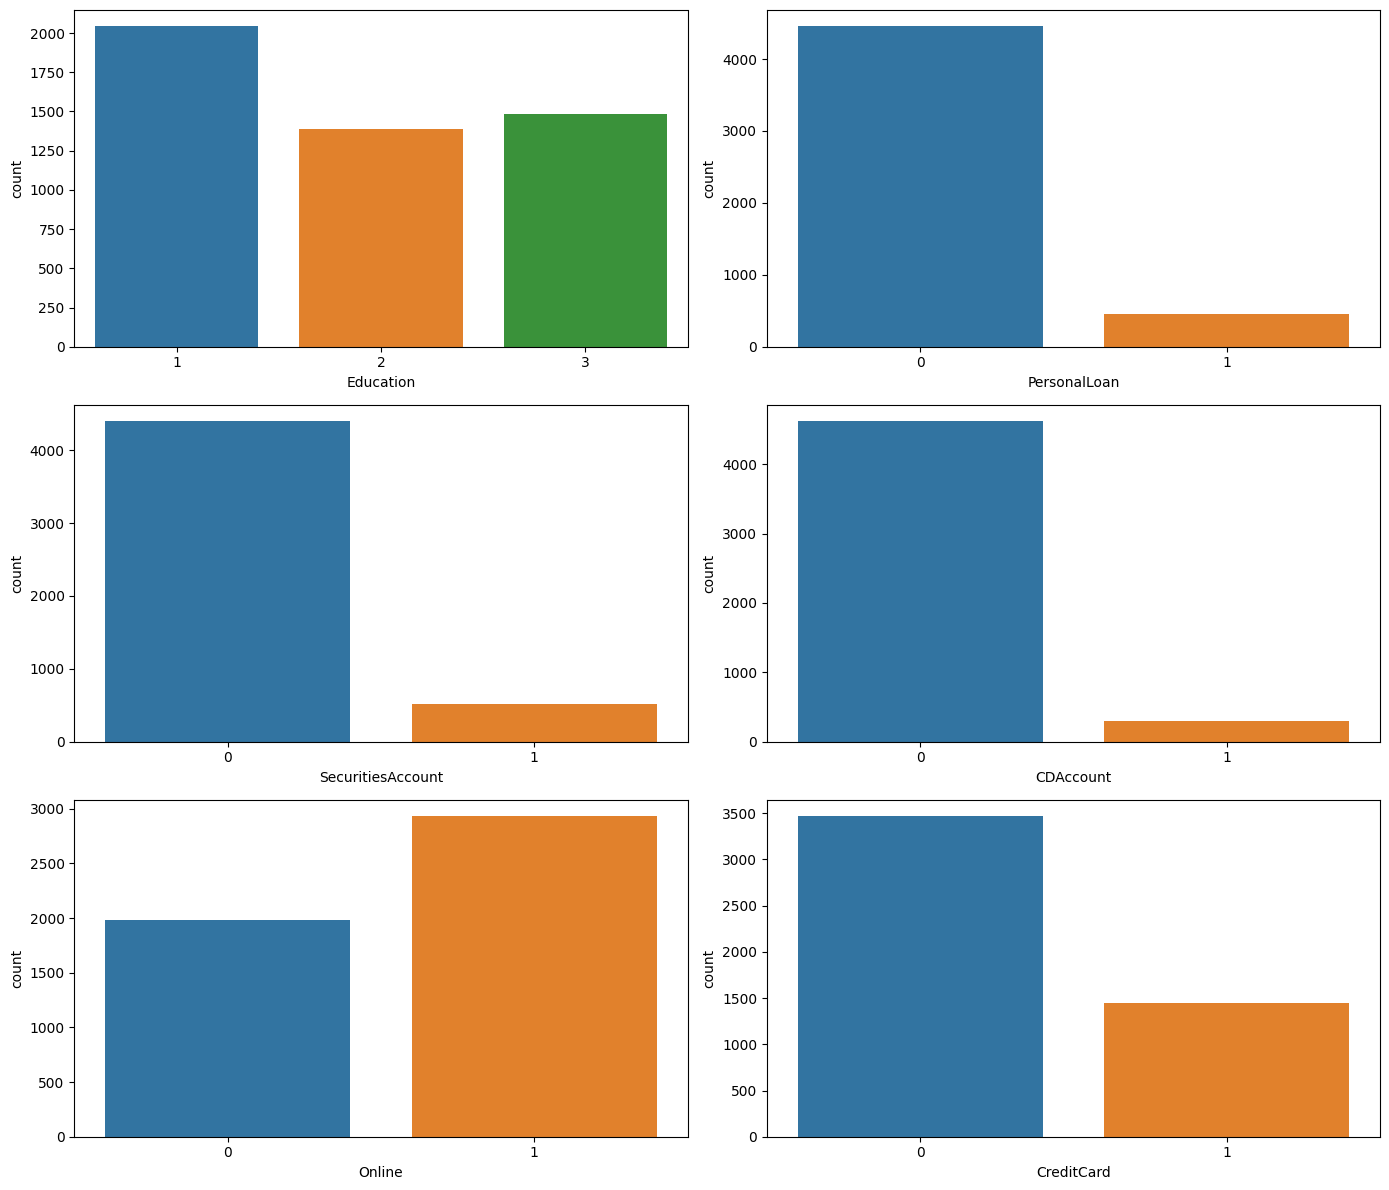

In [39]:
plt.figure(figsize=(14, 12))

for i, variable in enumerate(category):
    plt.subplot(3, 2, i + 1)   
    ax = sns.countplot(x = data[variable], data = data)
    plt.tight_layout()                                     

### Визуализация влияния признаков на целевую переменную

In [40]:
def stack_plot(x):
    tab = pd.crosstab(x, data['PersonalLoan'], normalize='index')
    tab.plot(kind='bar', stacked=True, figsize=(4,3))
    plt.xticks(rotation = 0)
    plt.show()

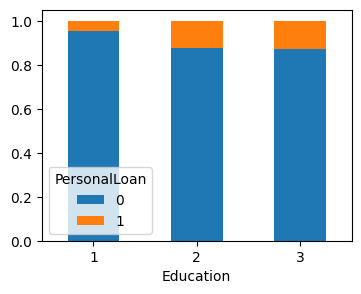

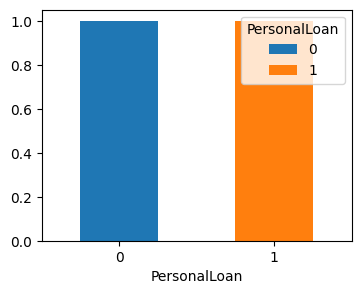

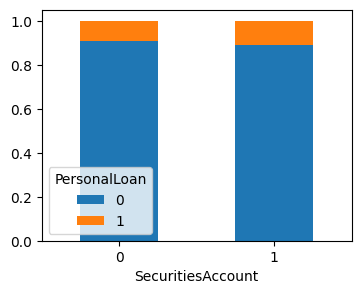

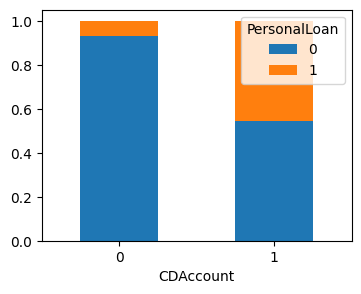

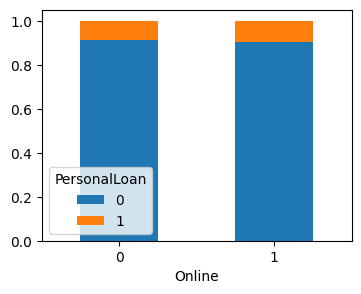

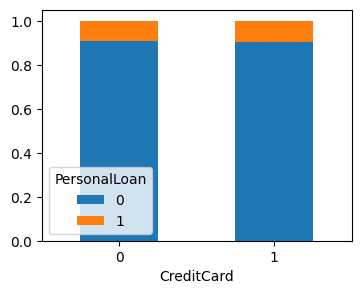

In [41]:
for i in category:
    stack_plot(data[i])

Т.о. из категориальных признаков наибольшее влияние оказывает образование (люди с более высоким уровнем образования предпочитают принять кредитное предложение банка) и наличие депозитного счета в банке 

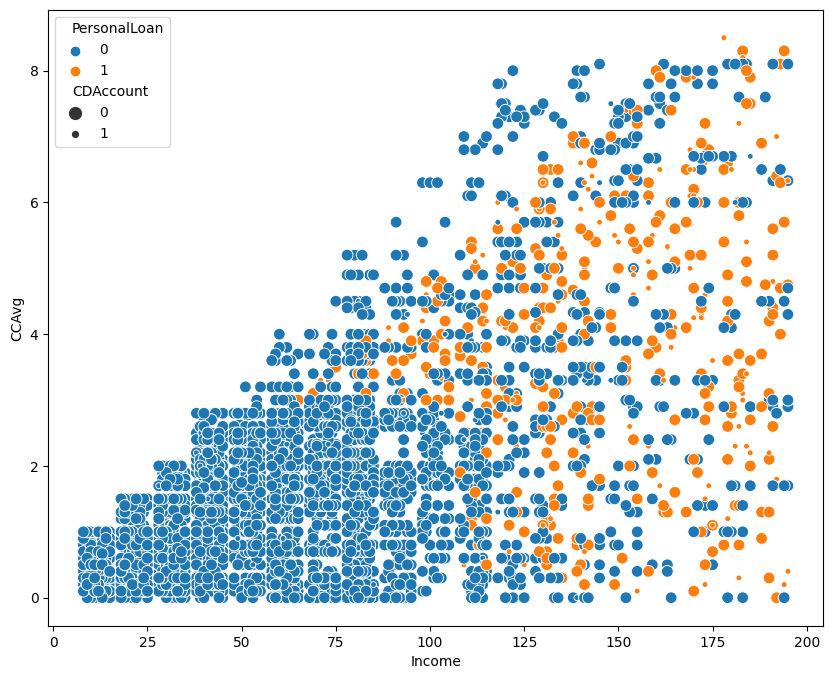

In [42]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Income', y = 'CCAvg', size = 'CDAccount', hue = 'PersonalLoan', data = data)
pass

Видно, что персональные предложения предпочитают принимать люди с доходом выше среднего

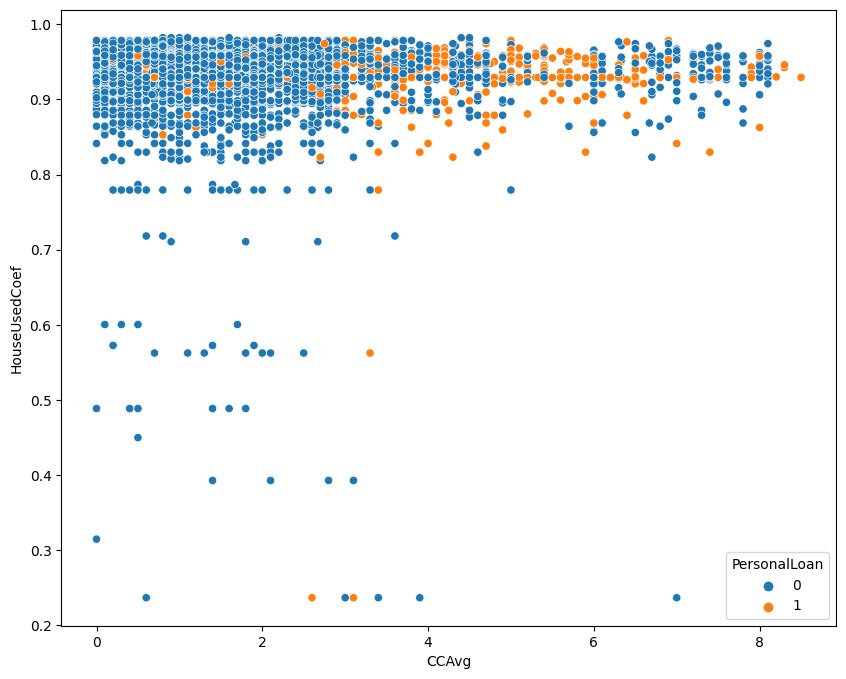

In [43]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'CCAvg', y = 'HouseUsedCoef', hue = 'PersonalLoan', data = data)
pass

Люди, живущие в "депрессивных" регионах (с большим числом брошенных домов) практически не принимают кредитные предложения банков

### Нормализация признаков

Удалим целевую переменную из выборки и нормализуем признаки

In [44]:
y = data['PersonalLoan'].astype('int64')
X = data.drop(['PersonalLoan'], axis=1)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [46]:
X

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Population,PopulationDensity,MedianHomeValue,MedianHouseholdIncome,HouseUsedCoef
0,-1.773527,-0.525257,1.390049,-0.170200,-1.054949,-0.565707,2.922959,-0.251779,-1.216992,-0.645627,-0.092922,-0.238496,0.195030,0.165385,0.317100
1,-0.032309,-0.862705,0.519941,-0.230459,-1.054949,-0.565707,2.922959,-0.251779,-1.216992,-0.645627,-0.015317,-0.284575,-0.088538,-0.047508,-0.017873
2,-0.554674,-1.380126,-1.220276,-0.531750,-1.054949,-0.565707,-0.342119,-0.251779,-1.216992,-0.645627,-0.015317,-0.284575,-0.088538,-0.047508,-0.017873
3,-0.902918,0.622068,-1.220276,0.492640,0.136474,-0.565707,-0.342119,-0.251779,-1.216992,-0.645627,2.759990,3.009906,0.059218,-0.206031,0.422599
4,-0.902918,-0.615243,1.390049,-0.531750,0.136474,-0.565707,-0.342119,-0.251779,-1.216992,1.548881,-0.015317,-0.284575,-0.088538,-0.047508,-0.017873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425283,-0.727726,-1.220276,0.010574,1.327898,-0.565707,-0.342119,-0.251779,0.821698,-0.645627,-0.015317,-0.284575,-0.088538,-0.047508,-0.017873
4996,-1.338223,-1.290140,1.390049,-0.893299,-1.054949,0.329972,-0.342119,-0.251779,0.821698,-0.645627,0.756867,-0.309935,1.818141,0.900599,-1.183527
4997,1.534787,-1.087671,-0.350168,-0.953557,1.327898,-0.565707,-0.342119,-0.251779,-1.216992,-0.645627,-0.851231,-0.890231,-0.327867,-0.584668,-0.381099
4998,1.708909,-0.525257,0.519941,-0.833041,0.136474,-0.565707,-0.342119,-0.251779,0.821698,-0.645627,1.443464,2.183634,0.212726,-0.791578,0.200571


## Построение и анализ моделей

### Логистическая регрессия

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, recall_score, precision_score
from sklearn import metrics

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
model.coef_

array([[ 0.03430218,  2.53041312,  0.81466102,  0.2946581 ,  1.37945044,
         0.10720414, -0.28567783,  0.84784849, -0.34772986, -0.40741715,
        -0.14310975, -0.07713511, -0.02233749, -0.01520849, -0.03306077]])

In [51]:
y_train_predict = model.predict(X_train)

In [52]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [53]:
train_reg_accuracy = np.mean(y_train_predict == y_train)
train_reg_recall = recall_score(y_train, y_train_predict)
train_reg_precision = precision_score(y_train, y_train_predict)

train_reg_accuracy, train_reg_recall, train_reg_precision

(0.9534587995930824, 0.6441558441558441, 0.8435374149659864)

In [54]:
test_reg_accuracy = np.mean(y_test_predict == y_test)
test_reg_recall = recall_score(y_test, y_test_predict)
test_reg_precision = precision_score(y_test, y_test_predict)
test_reg_r2 = model.score(X_test, y_test)

test_reg_accuracy, test_reg_recall, test_reg_precision

(0.9643947100712106, 0.6338028169014085, 0.8333333333333334)

Еще метрики

In [55]:
print('Evaluation:\n', metrics.classification_report(y_test, y_test_predict))

Evaluation:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       912
           1       0.83      0.63      0.72        71

    accuracy                           0.96       983
   macro avg       0.90      0.81      0.85       983
weighted avg       0.96      0.96      0.96       983



Модель показала достаточно высокие значения метрик и на тестовой и на обучающей выборке

### Метод k ближайших соседей

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
model = KNeighborsRegressor() 
model.fit(X_train, y_train)

KNeighborsRegressor()

In [58]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [59]:
train_neig_accuracy = np.mean(y_train_predict == y_train)
test_neig_accuracy = np.mean(y_test_predict == y_test)
train_neig_accuracy, test_neig_accuracy

(0.8552899287894201, 0.8504577822990844)

Метод показывает меньшие значения accuracy, по сравнению с регрессионной моделью. Попробуем подобрать параметры модели

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
best_model = KNeighborsRegressor(
   n_neighbors=5, 
   weights='distance',
   algorithm='auto',
   leaf_size=30,
   metric='euclidean',
   metric_params=None,
   n_jobs=4
)

In [62]:
model_params = best_model.get_params()
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['n_neighbors'] = range(1, 30)
clf = GridSearchCV(KNeighborsRegressor(), tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [63]:
best_model = KNeighborsRegressor(**best_params)
best_model.fit(X_train, y_train)
predicted = best_model.predict(X_test)

In [64]:
print('Used params:', best_params)
print('Evaluation:\n', np.mean(y_test == predicted))

Used params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': 4, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Evaluation:
 0.8504577822990844


Значение числа соседей, принятое по умолчанию (5) оказалось оптимальным для этого метода.

### Дерево решений

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

In [68]:
print('Evaluation:\n', metrics.classification_report(y_test, y_test_predict))

Evaluation:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       912
           1       0.85      0.87      0.86        71

    accuracy                           0.98       983
   macro avg       0.92      0.93      0.93       983
weighted avg       0.98      0.98      0.98       983



## Заключение

Наилучший результат показали логистическая регрессия и дерево решений - они показали высокие значения метрик качества.
Дальнейшее улучшение моделей можно провести путем подбора параметров дерева решений. Плюс возможен анализ признаков и исключение незначимых признаков из модели